<h1>Resolução de EDO - Métodos Numéricos</h1>

Guilherme Afonso Pillon de Carvalho Alves Pessoa<p>
Departamento de Engenharia Elétrica DEE/UFRN

## Resumo

Este trabalho foi realizado com o intuito de ser apresentado como avaliação referente a 2 unidade do curso de métodos computacionais em engenharia na UFRN. O escopo do problema envolveu a implementação de métodos numéricos para solução de EDOS de ordem N, utlizando os métodos de Kunge-Kutta e Adams-Bashforth-Moulton. Alterando periodicamente o passo das iterações, com o objetivo de analisar os erros em função da precisão de iteração.

## Introdução

### Runge-Kutta

Em análise numérica, os métodos de Runge–Kutta formam uma família importante de metódos iterativos implícitos e explícitos para a resolução numérica (aproximação) de soluções de equações diferenciais ordinárias. Estas técnicas foram desenvolvidas por volta de 1900 pelos matemáticos C. Runge e M.W. Kutta.
Um membro da família de métodos Runge–Kutta é usado com tanta frequência que costuma receber o nome de "RK4" ou simplesmente "o método Runge–Kutta". Seja um problema de valor inicial (PVI) especificado como segue,o método RK4 para este problema é dado pelas seguintes equações:                                                                           
$y'' = f(x,y)$                                     
$y(x_0) = y_0$                                 
$y'(x_0) = y'_0 = z_0$                                                 
$y_{i+1} = y_i + \frac{h}{6}*(k_{11}+2k_{12}+2k_{13}+k_{14})$    

Então, o próximo valor (yn+1) é determinado pelo valor atual (yn) somado com o produto do tamanho do intervalo (h) e uma inclinação estimada. 


### Método de passo múltiplo

Métodos de passo múltiplos são utilizados para a soluções numéricas de equações diferenciais ordinárias. Conceitualmente, um método numérico começa a partir de um ponto inicial e, em seguida, leva um pequeno passo para a frente no tempo para encontrar o próximo ponto da solução. O processo continua com os passos subsequentes para mapear a solução. Métodos de uma etapa (como o método de Euler) referem-se a apenas um ponto anterior e sua derivada a determinar o valor atual. Métodos como os Runge-Kutta dão alguns passos intermediários (por exemplo, um meio-passo) para obter um método de ordem superior, mas, em seguida, descartam todas as informações anteriores antes de tomar uma segunda etapa. Métodos de várias etapas tentam ganhar eficiência, mantendo e usando as informações a partir das etapas anteriores, em vez de descartá-las. Consequentemente, os métodos de várias etapas referem-se a vários pontos anteriores e valores derivados. No caso de métodos de várias etapas lineares, uma combinação linear dos pontos anteriores e os valores derivados são utilizados.

## Escopo dos problemas

A primeira parte do problema foi implementar o método de resolução numérica de EDOs, Runge-Kutta de 4 ordem, mais precisamente com o objetivo de resolver a seguinte equação $y'' - y - e^x = 0$ no intervalo de $[0,1]$, com condições iniciais $y(0) = 1$ e $y'(0) = 0$ alterando o passo da iteração, para posteriormente analisar os erros absolutos e percentuais das regressões.
    O segundo problema proposto foi o da utilização do método de Adams-Bashforth-Moulton, com inicialização por Kunge-Kutta de 3 ordem, para solução da seguinte expressão $y' + x^{2} + 2e^{-2x} = 0$ com condições iniciais de $y(0) = 1$ e posteriormente, assim como no primeiro problema, comparar com a solução exata da equação diferencial, $y(x) = \frac{x^3}{3} + e^{-2x}$.

## Código

Antes de tudo, precisamos incluir bibliotecas para que o trabalho seja feito de forma mais eficiente. As escolhidas para este projeto são math, que é utilizada para realizar calculos matemáticos simples, como raiz quadrada e valor absosuto e exponecial de euler. E a biblioteca matplotlib que é utilizada para gerar gráficos para que possamos analisar de forma transparente os resultados da pesquisa.

In [1]:
import matplotlib.pyplot as plt
import math

A primeira função crucial deste programa recebe valores de x e y e retorna a imagem da $f(x,y)$, sendo utilizada recursivamente na próxima estrutura, com o objetivo de simplificar o entendimento do leitor e processo de debug do código.

In [2]:
def apfun(x,y):
    #Função é y'' = f(x,y)
    #f(x,y) = y + e^x;
    ry = y + math.exp(x);
    return ry;

Para solução numérica da EDO proposta $y'' - y - e^x = 0$ no intervalo de $[0,1]$, com condições iniciais $y(0) = 1$ e $y'(0) = 0$, desenvolvi uma função que como entrada recebe o intervalo de interesse, passo de iteração e condições iniciais. E retorna vetores de X e Y, que correspondem ao resultado numérico aproximado, utilizando a seguinte fórmula matemática:

$y'' = f(x,y)$                                     
$y(x_0) = y_0$                                 
$y'(x_0) = y'_0 = z_0$                                                 

$y_{i+1} = y_i + \frac{h}{6}*(k_{11}+2k_{12}+2k_{13}+k_{14})$                                         
$z_{i+1} = z_i + \frac{h}{6}*(k_{21}+2k_{22}+2k_{23}+k_{24})$                                                                                      
$k_{11} = z_i$                                                                          
$k_{21} = f(x_i,y_i)$                                                
$k_{12} = z_i + \frac{h}{2}k_{21}$                                                              
$k_{22} = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_{11})$                                               
$k_{13} = z_i + \frac{h}{2}k_{22}$                                                            
$k_{23} = f(x_i + \frac{h}{2}, y_i + \frac{h}{2})$                                                  
$k_{14} = z_i + hk_{23}$                                                                              
$k_{24} = f(x_i + h, y_i + hk_{13}) $

In [3]:
def rk42ordem(intvlmin,intvlmax,h,y0,z0,debug):
   
    i = intvlmin;
    contador = 0;

    iterac = int((intvlmax-intvlmin)/h);#Quantidade de Iterações

    y = [0.0]*(iterac+1); #Tamanho dos Vetores
    z = [0.0]*(iterac+1);
    x = [0.0]*(iterac+1);
    
    y[0] = y0;#Condições Iniciais
    z[0] = z0;
    
    k11 = 0.0;
    k12 = 0.0;
    k13 = 0.0;
    k14 = 0.0;
    k21 = 0.0;
    k22 = 0.0;
    k23 = 0.0;
    k24 = 0.0;
    
    while(contador<iterac):

        k11 = z[contador]
        k21 = apfun(i,y[contador])
        k12 = z[contador] + ((k21*h)/2)
        k22 = apfun(( i + (h/2) ), ( y[contador] + ((k11*h)/2) ) )
        k13 = z[contador] + ((k22*h)/2)
        k23 = apfun(i + (h/2), y[contador] + ((k12*h)/2))
        k14 = z[contador] + (h*k23)
        k24 = apfun(i+h,y[contador] + (h*k13))



        y[contador+1] = y[contador] + (h * (k11 + (2*k12) + (2*k13) + k14)/6)
        z[contador+1] = z[contador] + (h * (k21 + (2*k22) + (2*k23) + k24)/6)
        
        if(debug == 1):
            print("i",i)
            print("k11",k11)
            print("k21",k21)
            print("k12",k12)
            print("k22",k22)
            print("k13",k13)
            print("k23",k23)
            print("k14",k14)
            print("k24",k24)
            print("y[cont+1]",y[contador+1])
            print("z[cont+1]",z[contador+1])

        x[contador] = i
        i = i+h;
        contador = contador + 1;
        x[contador] = i
        
    return x,y
    

    

Para que possamos comparar os resultados da solução numérica com a solução exata, desenvolvi outra função que recebe o intervalo de interesse e o passo, retornando valores de X e Y reais.

In [4]:
def solveq(intvlmin,intvlmax,h):
    
    i = intvlmin;
    contador = 0;
    iterac = int((intvlmax-intvlmin)/h);#Quantidade de Iterações
    y = [0.0]*(iterac+1);#Tamanho dos Vetores
    x = [0.0]*(iterac+1);
    
    while(contador<=iterac):
        
        x[contador] = i
        y[contador] = (0.25*math.exp(i)) + (0.75*math.exp(-i)) + (((math.exp(i))*i)/2)
        
        i = i+h;
        contador = contador + 1;
    
    
    return x,y

No corpo executável do código, foram executadas as funções de resolução numérica e exata, e posterior comparação gráfica dos resultados.

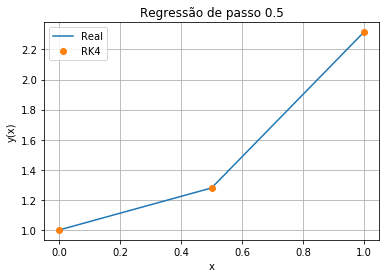

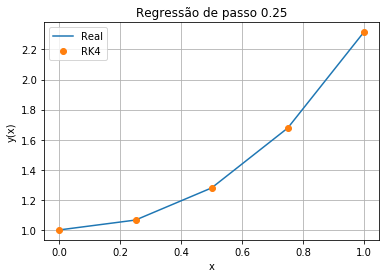

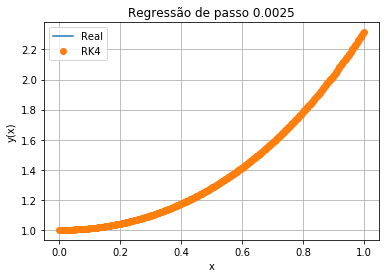

In [5]:
passos = [0.5,0.25,0.0025];
numX = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]
numY = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]
realX = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]
realY = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]

for i in range(len(passos)):
    
    (numX[i],numY[i]) = rk42ordem(0,1,passos[i],1,0,0); #Solução Numérica RK4
    (realX[i],realY[i]) = solveq(0,1,passos[i]);# Solução Real 

    
    titulo = "Regressão de passo ";
    titulo += str(passos[i]);
    plt.title(titulo);
    plt.xlabel('x');
    plt.ylabel('y(x)');
    plt.plot(realX[i],realY[i], label = "Real");
    plt.plot(numX[i],numY[i],'o' ,label = "RK4");
    plt.legend(loc='upper left')
    plt.grid(True)
    
    plt.show();
    


De posse dos vetores , obtidos pelo método de Kunge-Kutta de 4 ordem e pela aplicação na expressão exata, podemos desenvolver rotinas para análise de erros absolutos $Erro_i = |y_i| - |y2_i|$ e médio percentual , dado por $MPE = \frac{\sum_{\substack{i=0}}^{N} \frac{|y_i| - |y2_i|}{|y_i|}}{N}$


In [6]:
def analiseerros(yreal,yteste,passo):
    tamanho = len(yreal);
    erros = [0.0]*tamanho;
    somat = 0;
    MPE = 0;
    for i in range(tamanho):
        erros[i] = abs(abs(yreal[i]) - abs(yteste[i]));
        somat = somat + (erros[i] / abs(yreal[i]));
       
    MPE = somat / tamanho;
    
    titulo = "Erro Absoluto regressão de passo ";
    titulo += str(passo);
    titulo += " com MPE = "
    titulo += str(100-(MPE*100));
    plt.title(titulo);
    plt.xlabel('Posição');
    plt.ylabel('Erro Absoluto');
    plt.plot(erros);
    plt.grid(True)
    plt.show();
    
    return erros,MPE

Para aplicação da ultima função desenvolvida, em todas as precisões declaradas.

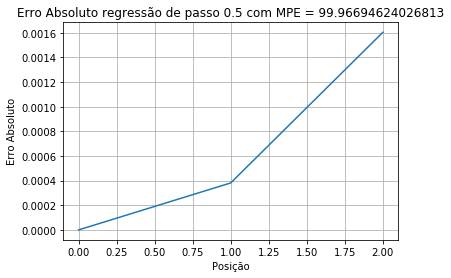

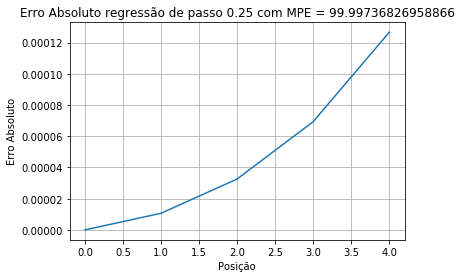

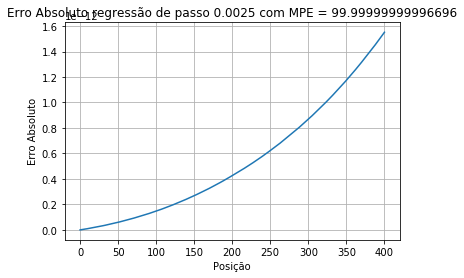

In [7]:
for i in range(len(passos)):
    (erros,MPE) = analiseerros(realY[i],numY[i],realX[i][1]-realX[i][0])

Assim como esperado, observamos claramente uma diferença muito grande em relação a precisão da solução numérica, em função do passo de iterações

## Código 2

Para solução do segundo problema proposto, devemos utilizar o método de Runge-kutta de 3 ordem como inicializador e concluir utilizando o método de Adams-Bashforth-Moulton. Para isso, foram necessárias mais algumas funções. Sendo elas rk31ordem, adbam, solveq 2 e appfun2. Utilizadas para o método de kunge-kutta de 3 ordem, para o método de Adams-Bashforth-Moulton, para solução exata e aplicar a função no ponto respectivamente.

In [8]:
def apfun2(x,y):
    #Função é y' = f(x,y)
    #f(x,y) = x^2 - 2e^-2x
    ry = (x**2) - (2*math.exp(-2*x));
    return ry;

A seguinte função realiza a seguinte iteração matemática:

$y' = f(x,y)$                                     
$y(x_0) = y_0$                                                                                  

$y_{i+1} = y_i + \frac{h}{6}*(k_{1}+4k_{2}+k_{3})$                                         
                                                                                
                                                                        
$k_{1} = f(x_i,y_i)$                                                                                 
$k_{2} = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_{1})$                                                                                                                            
$k_{3} = f(x_i + h, y_i + 2hk_{2} - hk_1) $

Retornando os valores estimados de X e Y.

In [9]:
def rk31ordem (intvlmin,intvlmax,h,y0,debug):
    
    i = intvlmin;
    contador = 0;
    iterac = int((intvlmax-intvlmin)/h);#Quantidade de Iterações

    y = [0.0]*(iterac+1); #Tamanho dos Vetores
    x = [0.0]*(iterac+1);
    
    y[0] = y0;#Condições Iniciais
    
    k1 = 0.0;
    k2 = 0.0;
    k3 = 0.0;
    
    while(contador<iterac):

        k1 = apfun2(i,y[contador])
        k2 = apfun2(i+(h/2),y[contador] + ((h/2)*k1))
        k3 = apfun2(i+h,y[contador] + (2*h*k2) - (h*k1));

        y[contador+1] = y[contador] + (h * (k1 + (4*k2) + k3)/6)
        
        if(debug == 1):
            print("i",i)
            print("k1",k1)
            print("k2",k2)
            print("k3",k3)
            print("y[cont+1]",y[contador+1])
          

        x[contador] = i
        i = i+h;
        contador = contador + 1;
        x[contador] = i
        
    return x,y;

Depois de inicializado o vetor com as estimações de y, podemos utilizar o método de adam-bashforth, que é dado pela seguinte expressão matemática $y_{i+1} = y_i + (\frac{h}{24})[55f(x_i,y_i) - 59f(x_{i-1},y_{i_1}) + 37f(x_{i-2},y_{i-2}) - 9f(x_{i-3},y_{i-3})]$

In [10]:
def adbam(x,y,h,intvlmin,intvlmax):
    i = intvlmin;
    contador = 3;
    iterac = int((intvlmax-intvlmin)/h); #Quantidade de Iterações

    while(contador<iterac):
        y[contador+1] = y[contador] + ((h/24)*((55*apfun2(x[contador],y[contador])) - (59*apfun2(x[contador-1],y[contador-1])) + (37*apfun2(x[contador-2],y[contador-2])) - (9*apfun2(x[contador-3],y[contador-3])) )) 
        contador = contador + 1;

        
    return y;

Assim como no primeiro problema, optei por desenvolver uma função para aplicar os valores de X, contidos em um vetor para gerar a imagem algébrica, para posterior avaliação de erros.

In [11]:
def solveq2(intvlmin,intvlmax,h):
    i = intvlmin;
    contador = 0;
    iterac = int((intvlmax-intvlmin)/h); #Quantidade de Iterações
    y = [0.0]*(iterac+1);                #Tamanho dos Vetores
    x = [0.0]*(iterac+1);
    
    while(contador<=iterac):
        
        x[contador] = i
        y[contador] = ((i**3)/3) + (math.exp(-2*i))    #Solução Exata
        i = i+h;
        contador = contador + 1;
        
    return x,y;
    

Agora com todas as funções podemos de fato executar o código e observar gráficamente os resultados obtidos pelo método RK3 + Adam-Bash e obtidos pela função algébrica.

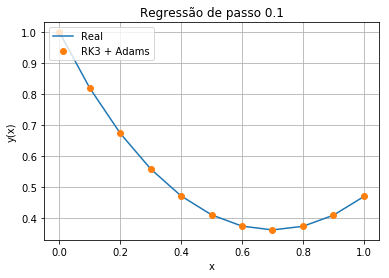

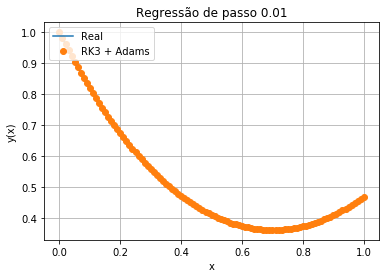

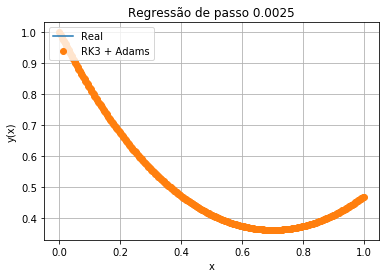

In [12]:
passos = [0.1,0.01,0.0025];
num2X = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]
num2Y = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]
real2X = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]
real2Y = [[0 for x in range(int(1/min(passos)))] for y in range(len(passos))]


for i in range(len(passos)):
    
    (num2X[i],num2Y[i]) = rk31ordem(0,1,passos[i],1,0); #Solução Numérica RK3
    num2Y[i] = adbam(num2X[i],num2Y[i],passos[i],0,1); #Aplicando método de Adam-Besh
    
    (real2X[i],real2Y[i]) = solveq2(0,1,passos[i]);# Solução Real

    
    titulo = "Regressão de passo ";
    titulo += str(passos[i]);
    plt.title(titulo);
    plt.xlabel('x');
    plt.ylabel('y(x)');
    plt.plot(real2X[i],real2Y[i], label = "Real");
    plt.plot(num2X[i],num2Y[i],'o',label = "RK3 + Adams");
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show();
    


Para realizar uma aferição mais precisa do método, utilizei a mesma função desenvolvida para o primeiro problema, entrando com vetor exato e vetor a ser testado, gerando gráficos com erro absoluto e médio percentual.

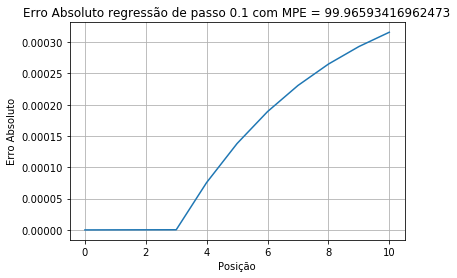

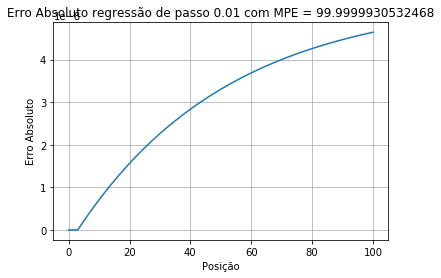

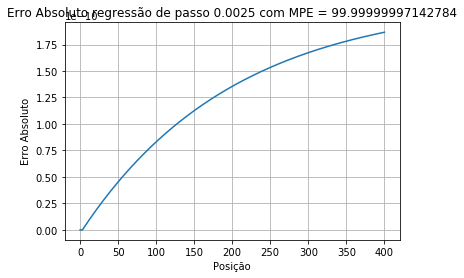

In [13]:
for i in range(len(passos)):
    (erros2,MPE2) = analiseerros(real2Y[i],num2Y[i],real2X[i][1]-real2X[i][0])

## Conclusões

Com os resultados obtidos, podemos observar que os erros para resolução de EDOs pelo método de Runge-Kutta de 4 ordem são quase desprezíveis, mesmo com resolução de passo de 0.5 , conseguimos alcancar um erro médio relativo na ordem de 

In [14]:
MPE

3.3038068400172974e-13

Sendo, na maioria dos casos, considerado um erro desprezível. 
Em relação ao segundo problema, conseguimos, também uma ótima aproximação, com erros a partir da sexta casa decimal. 
Desta forma, podemos concluir que ambos métodos de solução numérica de EDO são viáveis para a maioria dos casos


## Referências

http://sites.poli.usp.br/d/pmr2420/a4-2420.pdf
https://pt.wikipedia.org/wiki/M%C3%A9todo_de_passo_m%C3%BAltiplo
http://www.mat.ufmg.br/~espec/Monografias_Noturna/Monografia_KarineNayara.pdf
http://www.ime.unicamp.br/~valle/Teaching/2015/MS211/Aula14.pdf
https://www.ufrgs.br/numerico/livro/pdvi-o_metodo_de_adams-bashforth.html
https://pt.wikipedia.org/wiki/M%C3%A9todo_de_passo_m%C3%BAltiplo